In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import os

In [2]:
train_df = pd.read_csv("train-small.csv")
# Print first 5 rows
print(f'There are {train_df.shape[0]} rows and {train_df.shape[1]} columns in this data frame')
train_df.head()

There are 1000 rows and 16 columns in this data frame


,Image,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,PatientId,Pleural_Thickening,Pneumonia,Pneumothorax
0,00008270_015.png,0,0,0,0,0,0,0,0,0,0,0,8270,0,0,0
1,00029855_001.png,1,0,0,0,1,0,0,0,1,0,0,29855,0,0,0
2,00001297_000.png,0,0,0,0,0,0,0,0,0,0,0,1297,1,0,0
3,00012359_002.png,0,0,0,0,0,0,0,0,0,0,0,12359,0,0,0
4,00017951_001.png,0,0,0,0,0,0,0,0,1,0,0,17951,0,0,0


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Image               1000 non-null   object
 1   Atelectasis         1000 non-null   int64 
 2   Cardiomegaly        1000 non-null   int64 
 3   Consolidation       1000 non-null   int64 
 4   Edema               1000 non-null   int64 
 5   Effusion            1000 non-null   int64 
 6   Emphysema           1000 non-null   int64 
 7   Fibrosis            1000 non-null   int64 
 8   Hernia              1000 non-null   int64 
 9   Infiltration        1000 non-null   int64 
 10  Mass                1000 non-null   int64 
 11  Nodule              1000 non-null   int64 
 12  PatientId           1000 non-null   int64 
 13  Pleural_Thickening  1000 non-null   int64 
 14  Pneumonia           1000 non-null   int64 
 15  Pneumothorax        1000 non-null   int64 
dtypes: int64(15), object(1)
m

In [5]:
print(f"The total number of entries are {train_df.shape[0]}, whereas the unique patient ids present are {train_df['PatientId'].value_counts().shape[0]}")

The total number of entries are 1000, whereas the unique patient ids present are 928


In [10]:
cols = list(train_df.columns)
print(cols)

['Image', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'PatientId', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [11]:
cols.remove('Image')
cols.remove('PatientId')

In [12]:
for c in cols:
    print(f"There are {train_df[c].sum()} samples for the class {c}")

There are 106 samples for the class Atelectasis
There are 20 samples for the class Cardiomegaly
There are 33 samples for the class Consolidation
There are 16 samples for the class Edema
There are 128 samples for the class Effusion
There are 13 samples for the class Emphysema
There are 14 samples for the class Fibrosis
There are 2 samples for the class Hernia
There are 175 samples for the class Infiltration
There are 45 samples for the class Mass
There are 54 samples for the class Nodule
There are 21 samples for the class Pleural_Thickening
There are 10 samples for the class Pneumonia
There are 38 samples for the class Pneumothorax


In [14]:
# visualizing images

images = train_df.Image.values
images[1:4]

array(['00029855_001.png', '00001297_000.png', '00012359_002.png'],
      dtype=object)

In [15]:
some_images = [np.random.choice(images) for i in range(16)]

In [16]:
some_images

['00001232_002.png',
 '00025220_001.png',
 '00028996_009.png',
 '00010524_001.png',
 '00007185_020.png',
 '00014520_021.png',
 '00021457_009.png',
 '00030158_001.png',
 '00015647_003.png',
 '00026399_003.png',
 '00003947_000.png',
 '00030410_006.png',
 '00000121_008.png',
 '00017972_002.png',
 '00005348_004.png',
 '00029464_012.png']

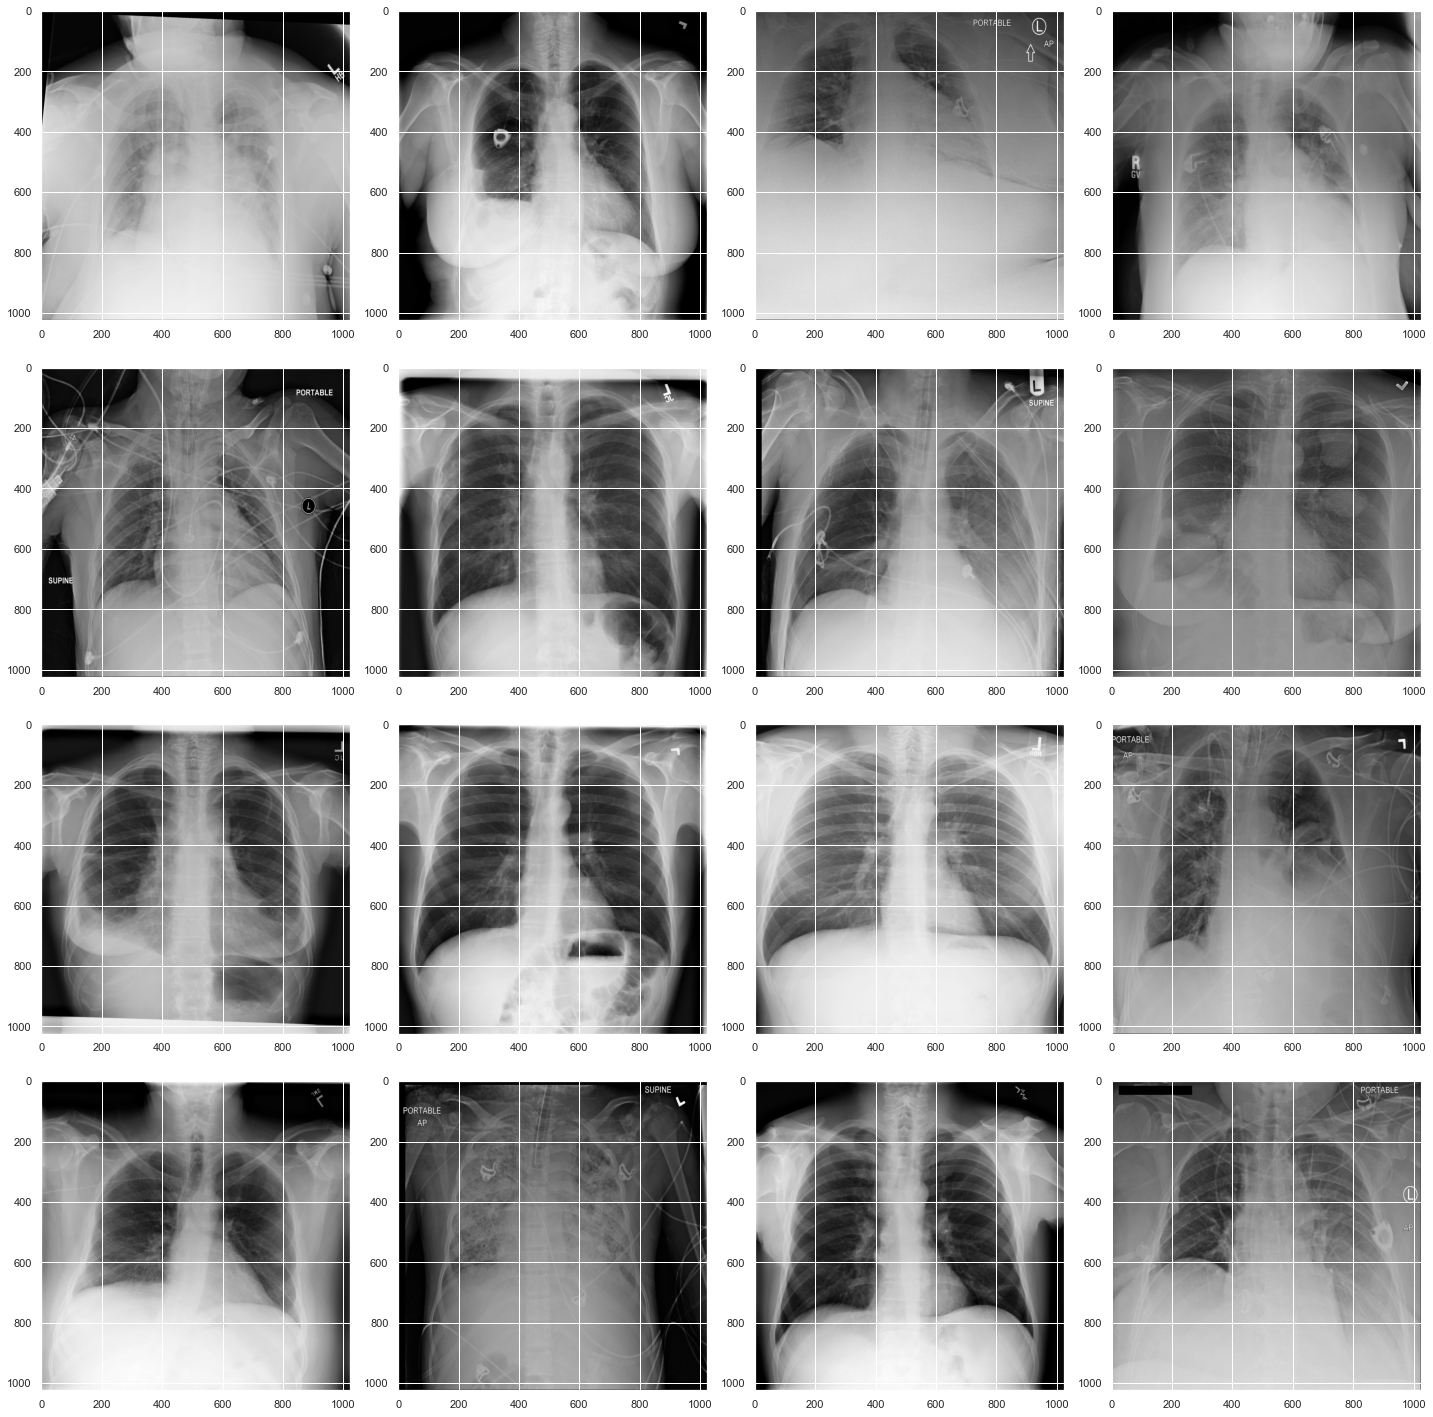

In [17]:
image_dir = 'images-small'
plt.figure(figsize=(20,20))

for i in range(len(some_images)):
    image_path = os.path.join(image_dir, some_images[i])
    plt.subplot(4,4,i+1)
    img  = plt.imread(image_path)
    plt.imshow(img, cmap='gray')
    
plt.tight_layout()

In [19]:
raw_image = plt.imread(os.path.join(image_dir, images[4]))

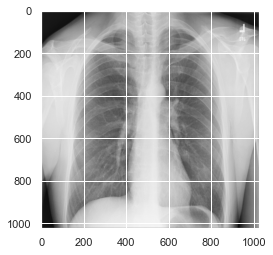

In [21]:
plt.imshow(raw_image, cmap="gray")

C:\Users\biswa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


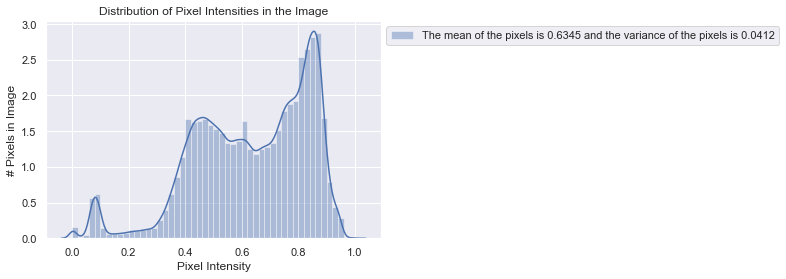

In [24]:
sns.distplot(raw_image.ravel(), label=f"The mean of the pixels is {raw_image.mean():.4f} and the variance of the pixels is {raw_image.var():.4f}")
plt.legend(bbox_to_anchor=(1,1))
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

plt.show()

### Image Preprocessing using Keras

In [25]:
from keras.preprocessing.image import ImageDataGenerator

In [26]:
image_datagen = ImageDataGenerator(
                    samplewise_center=True, # center each sample
                    samplewise_std_normalization=True # make standard deviation 1 for each sample
)

In [27]:
# flow from dataframe

generator = image_datagen.flow_from_dataframe(dataframe=train_df,
                                              directory='images-small/',
                                              x_col="Image", #features
                                              y_col="Mass", #say we are building model for mass detection
                                              class_mode="raw", #we want the raw label values present in the dataframe for mass
                                              batch_size=1,
                                              shuffle=False,
                                              target_size=(320,320) # width and height of output image
)

Found 1000 validated image filenames.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The dimensions of the image are 320 pixels width and 320 pixels height
The maximum pixel value is 1.7999 and the minimum is -1.7404
The mean value of the pixels is 0.0000 and the standard deviation is 1.0000


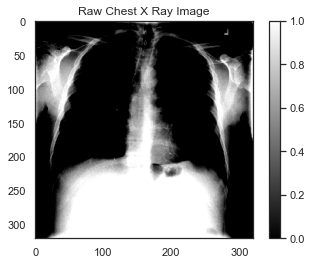

In [28]:
sns.set_style("white")
generated_image, label = generator.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

In [30]:
generated_image.shape

(1, 320, 320, 3)

C:\Users\biswa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '# Pixel')

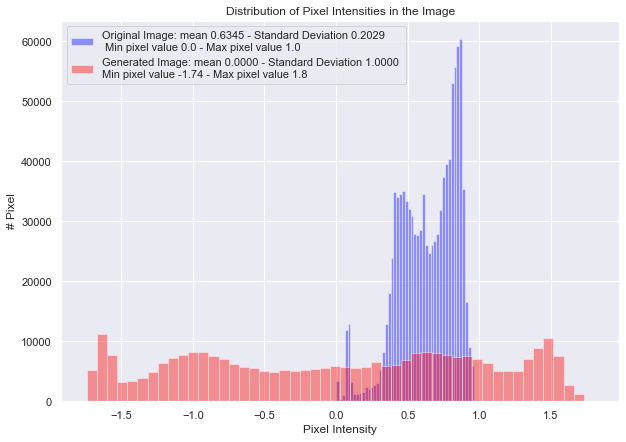

In [31]:
# Include a histogram of the distribution of the pixels
sns.set()
plt.figure(figsize=(10, 7))

# Plot histogram for original iamge
sns.distplot(raw_image.ravel(), 
             label=f'Original Image: mean {np.mean(raw_image):.4f} - Standard Deviation {np.std(raw_image):.4f} \n '
             f'Min pixel value {np.min(raw_image):.4} - Max pixel value {np.max(raw_image):.4}',
             color='blue', 
             kde=False)

# Plot histogram for generated image
sns.distplot(generated_image[0].ravel(), 
             label=f'Generated Image: mean {np.mean(generated_image[0]):.4f} - Standard Deviation {np.std(generated_image[0]):.4f} \n'
             f'Min pixel value {np.min(generated_image[0]):.4} - Max pixel value {np.max(generated_image[0]):.4}', 
             color='red', 
             kde=False)

# Place legends
plt.legend()
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixel')